# Plotting with Matplotlib
Use Matplotlib to create bar charts that visualize the conclusions you made with groupby and query.

In [24]:
# Import necessary packages and load `winequality_edited.csv`
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline 

df = pd.read_csv('winequality_edited.csv')
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,Low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,Moderately High
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,Moderately High
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,Low


### #1: Do wines with higher alcoholic content receive better ratings?
Create a bar chart with one bar for low alcohol and one bar for high alcohol wine samples. This first one is filled out for you.

In [3]:
# Use query to select each group and get its mean quality
median = df['alcohol'].median()
low = df.query('alcohol < {}'.format(median))
high = df.query('alcohol >= {}'.format(median))

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

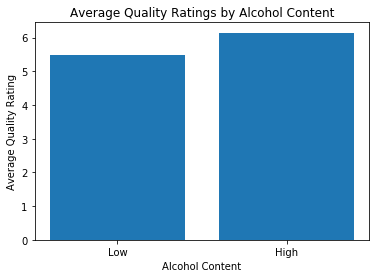

In [4]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

### #2: Do sweeter wines receive higher ratings?
Create a bar chart with one bar for low residual sugar and one bar for high residual sugar wine samples.

In [20]:
# Use query to select each group and get its mean quality
sugar_median = df['residual_sugar'].median()
low_sugar = df.query('residual_sugar < {}'.format(sugar_median))
high_sugar = df.query('residual_sugar >= {}'.format(sugar_median))

sugar_mean_quality_low = low_sugar['quality'].mean()
sugar_mean_quality_high = high_sugar['quality'].mean()

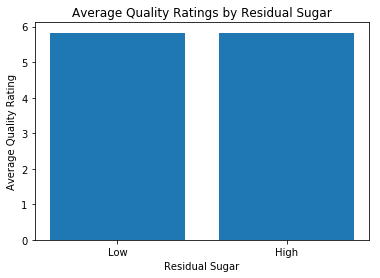

In [21]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [sugar_mean_quality_low, sugar_mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Residual Sugar')
plt.xlabel('Residual Sugar')
plt.ylabel('Average Quality Rating');


### #3: What level of acidity receives the highest average rating?
Create a bar chart with a bar for each of the four acidity levels.

In [50]:
# Use groupby to get the mean quality for each acidity level
acidity_mean = df.groupby(['acidity_levels'])['quality'].mean().sort_values(ascending=False)
acidity_mean

acidity_levels
Low                5.859593
Medium             5.850832
Moderately High    5.784540
High               5.783343
Name: quality, dtype: float64

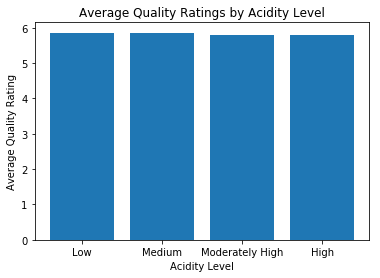

In [59]:
# Create a bar chart with proper labels
locations = [1,2,3,4]
heights = [acidity_mean[0],acidity_mean[1],acidity_mean[2],acidity_mean[3]]
labels = ['Low', 'Medium', 'Moderately High', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Acidity Level')
plt.xlabel('Acidity Level')
plt.ylabel('Average Quality Rating');

### Bonus: Create a line plot for the data in #3
You can use pyplot's [plot](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) function for this.

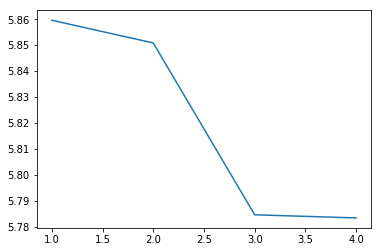

In [60]:
plt.plot(locations, heights)

Compare this with the bar chart. How might showing this visual instead of the bar chart affect someone's conclusion about this data?